# 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.uniform(0, 10., size=100)

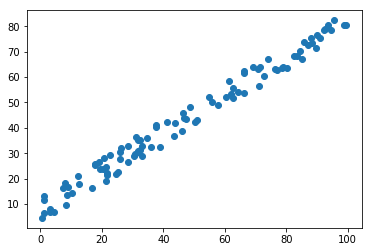

In [3]:
plt.scatter(X[:,0], X[:, 1])
plt.show()

## demean

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

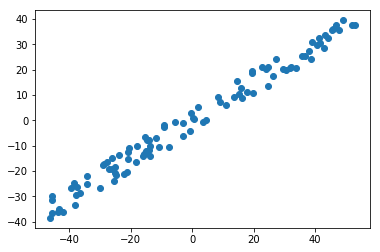

In [6]:
plt.scatter(X_demean[:,0], X_demean[:, 1])
plt.show()

In [7]:
np.mean(X_demean[:, 0]), np.mean(X_demean[:, 1])

(5.719869022868807e-15, 5.613287612504792e-15)

## 梯度上升法

In [8]:
# 目标函数
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [9]:
# 目标函数的梯度
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2 / len(X)

In [10]:
# 使得每一次的w向量模都是1
def direction(w):
    return w / np.linalg.norm(w)

# 梯度上升过程
def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient_ascent = df(w, X)
        last_w = w
        w = w + eta * gradient_ascent
        w = direction(w)
        if (abs(f(w, X)-f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [11]:
initial_w = np.random.random(X.shape[1])  # 不能从0向量开始
initial_w

array([0.96741883, 0.05057319])

In [12]:
eta = 0.001

In [13]:
# 不能使用StandardScaler标准数据来PCA

In [14]:
w = gradient_ascent(df_math, X, initial_w, eta)

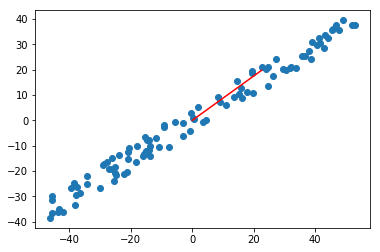

In [15]:
plt.scatter(X_demean[:,0], X_demean[:, 1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

## 求数据的前n个成分

In [16]:
# 去除第一主成分的分量
X2 = np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w) * w

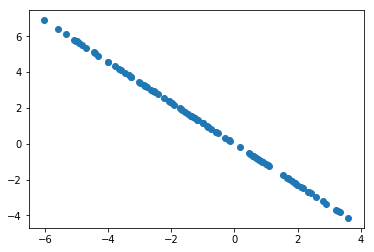

In [17]:
plt.scatter(X2[:,0], X2[:, 1])
plt.show()

In [18]:
w2 = gradient_ascent(df_math, X2, initial_w, eta)
w2

array([ 0.65841084, -0.75265873])

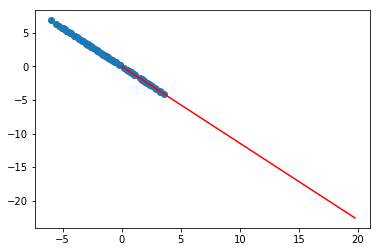

In [19]:
plt.scatter(X2[:,0], X2[:, 1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()

In [20]:
w.dot(w2) # 垂直

9.509280389569108e-05